# Logistic Regression For Gender Voice Recognition 


In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd
import time
from matplotlib import pyplot

from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

# Dataset

In [2]:
# Loading the voice dataset
df = pd.read_csv("voice.csv")

In [3]:
# Printing the head rows data
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
# Extracting target class (labels)
y = df.label

# Extracting non-target class (20 classes)
x = df.drop('label', axis = 1)

print('Number of examples in the data:', x.shape)

Number of examples in the data: (3168, 20)


# Encoding

In [5]:
# Relabeling the target classes to 
# male      -->   1
# female    -->   0

df['label'] = [1 if i=='male' else 0 for i in df.label]
df.label.value_counts()

1    1584
0    1584
Name: label, dtype: int64

# Scaling

In [6]:
x = df.drop(['label'],axis=1)
y = df.label.values

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

# Splitting Training and Testing Dataset

In [8]:
#Using the train_test_split to create train and test datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.20,random_state = 42)

# Default Implementation

In [9]:
classifier=LogisticRegression()
start = time.perf_counter()
classifier.fit(x_train,y_train)
end = time.perf_counter()
y_pred=classifier.predict(x_test)
print('Accuracy Score   :   ',end=" ")
print(metrics.accuracy_score(y_test,y_pred))
print("Time Taken       :    "+str(end-start))

Accuracy Score   :    0.9810725552050473
Time Taken       :    0.4909290000000013


# Classification Report

In [10]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       297
           1       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [11]:
accscore = accuracy_score (y_test, y_pred)
recscore = recall_score (y_test, y_pred)
f1score = f1_score (y_test, y_pred)
prescor = precision_score(y_test, y_pred)

In [12]:
print("Accuracy score  : "+str(accscore))
print("Precision score : "+str(prescor))
print("Recall score    : "+str(recscore))
print("F1 score        : "+str(f1score))

Accuracy score  : 0.9810725552050473
Precision score : 0.9850746268656716
Recall score    : 0.9792284866468842
F1 score        : 0.982142857142857


# Confusion Matrix

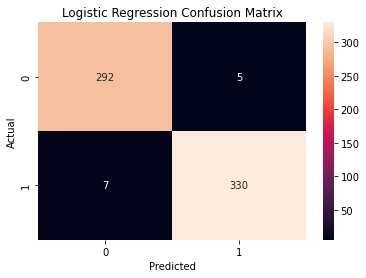

In [13]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# ROC Curve

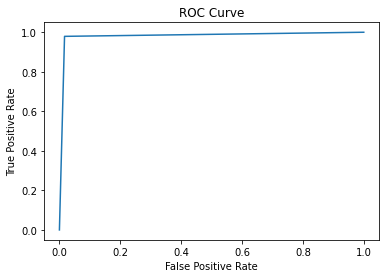

Area Under ROC Curve: 0.9811967349059336


In [14]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr1,fpr1)
plt.show()
auc = np.trapz(fpr1,tpr1)
print("Area Under ROC Curve:", auc)

# Hyperparameter Tuning

In [48]:
grid_params =[
    {
        'C':[0.1,10.0,100.0,1000.0],
        'max_iter' : [100,2500,5000]
    }
]

In [11]:
lr = GridSearchCV(LogisticRegression(), grid_params, verbose = True, cv=3, n_jobs = -1)

In [12]:
gs =lr.fit(x_train, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    3.4s finished


In [13]:
gs.best_params_

{'C': 10.0, 'max_iter': 100}

In [15]:
lr1 = LogisticRegression(C=10.0,max_iter= 100)

In [16]:
start = time.perf_counter()
lr1.fit(x_train, y_train)
end = time.perf_counter()
y_pred1=lr1.predict(x_test)
print('Accuracy Score   :   ',end=" ")
print(metrics.accuracy_score(y_test,y_pred1))
print('Time Taken       :    '+str(end-start))

Accuracy Score   :    0.9810725552050473
Time Taken       :    0.06722070000000002


ROC Curve

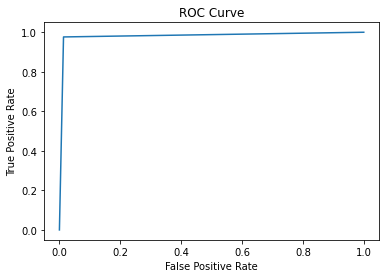

Area Under ROC Curve: 0.9813965570642128


In [17]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, y_pred1, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr1,fpr1)
plt.show()
auc = np.trapz(fpr1,tpr1)
print("Area Under ROC Curve:", auc)

# Confusion Matrix

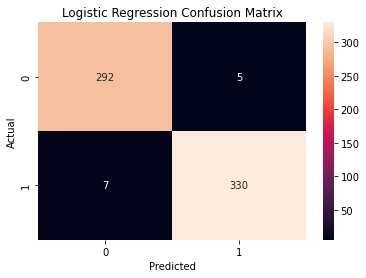

In [18]:
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Classification Report

In [19]:

print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       297
           1       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [20]:
accscore = accuracy_score (y_test, y_pred)
recscore = recall_score (y_test, y_pred)
f1score = f1_score (y_test, y_pred)
prescor = precision_score(y_test, y_pred)

In [21]:
print("Accuracy score  : "+str(accscore))
print("Precision score : "+str(prescor))
print("Recall score    : "+str(recscore))
print("F1 score        : "+str(f1score))

Accuracy score  : 0.9810725552050473
Precision score : 0.9850746268656716
Recall score    : 0.9792284866468842
F1 score        : 0.982142857142857


# Recursive Feature Elimination

In [22]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator = lr1,step=1)
rfe.fit(x_train,y_train)
x_train_selected = rfe.transform(x_train)
x_test_selected = rfe.transform(x_test)

In [23]:
all_features = []
for i in range(20):
    all_features.append(df.columns[i])

In [24]:
selected_features = pd.DataFrame({'Feature':list(all_features),
                         'Ranking':rfe.ranking_})
selected_features.sort_values(by = 'Ranking')

,Feature,Ranking
9,sfm,1
13,minfun,1
12,meanfun,1
11,centroid,1
8,sp.ent,1
7,kurt,1
19,modindx,1
5,IQR,1
4,Q75,1
3,Q25,1


In [25]:
start   = time.perf_counter()
lr1.fit(x_train_selected,y_train)
end   = time.perf_counter()
print("Scores After Recursive Feature Elimination:",format(lr1.score(x_test_selected,y_test)))
print("Time Taken : "+str(end-start))
start   = time.perf_counter()
lr1.fit(x_train,y_train)
end   = time.perf_counter()
print("Scores :",format(lr1.score(x_test,y_test)))
print("Time Taken : "+str(end-start))

Scores After Recursive Feature Elimination: 0.9810725552050473
Time Taken : 0.0234121000000016
Scores : 0.9810725552050473
Time Taken : 0.060218399999996564
